https://cds-beta.climate.copernicus.eu/training

#0 Mount Google Drive Folder

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

!ls

Mounted at /content/gdrive/
gdrive	sample_data


In [2]:
workdir  = "/content/gdrive/My Drive/GECO_RESEARCH/11_R&DGE_SAFER_IDR_12072018_S/SAFERPLACES_Project/corso_geospatial_cescot_2024/lecture_Bagli_Geospatial_2024/"

%cd "$workdir"
!ls



/content/gdrive/My Drive/GECO_RESEARCH/11_R&DGE_SAFER_IDR_12072018_S/SAFERPLACES_Project/corso_geospatial_cescot_2024/lecture_Bagli_Geospatial_2024
 0.2_rasterio.ipynb				    '6_webapps 2.ipynb'
 0_notebooks.ipynb				     6_webapps.ipynb
 1_C3S_climate-data-store.ipynb			     Bagli_Geospatial_2024.pptx
 2_reanalysis-climatology.ipynb			     C3S_data-tutorial-italiano_2020-11.ipynb
 3_Emilia_Romagna_Flood_2024.ipynb		    'Create your first book.pdf'
 4_Hazard_assessment_FLOOD_COASTAL_floodmaps.ipynb   data
'5_applications_GEE (1).ipynb'			     img
 5_applications_GEE.ipynb			     leafmap.ipynb


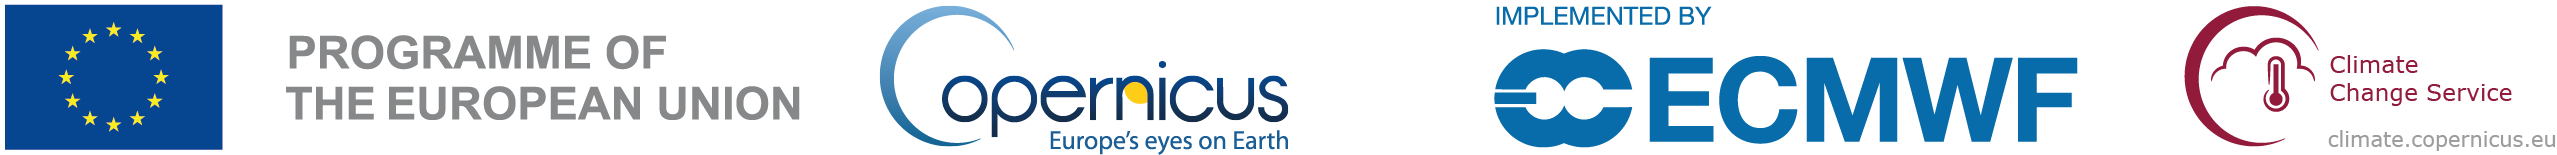



<br>

# The Copernicus Climate Data Store (CDS) - Introduction and data access example

This notebook provides you an introduction to the Copernicus Climate Data Store (CDS), an overview of the type of data that can be accessed and gives practical examples how to access and retrieve data from the CDS.

### Outline
* [1 - About](#about)
* [2 - C3S data retrieval](#c3s_data_retrieval)
  * [2.1 - Access data interactively via the CDS web interface](#access_manual)
  * [2.2 - Access data programmatically with the CDS API](#access_programmatic)
  * [2.3 - Further resources](#further_resources)
* [3 - Example data request](#example_requests)

### How to access the notebook

This tutorial is in the form of a [Jupyter notebook](https://jupyter.org/). You will not need to install any software for the training as there are a number of free cloud-based services to create, edit, run and export Jupyter notebooks such as this. Here are some suggestions (simply click on one of the links below to run the notebook):

|Binder|Kaggle|Colab|NBViewer|
|:-:|:-:|:-:|:-:|
|[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/ecmwf-projects/copernicus-training/HEAD?urlpath=lab/tree/C3S_climate-data-store.ipynb)|[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/copernicus-training/blob/master/C3S_climate-data-store.ipynb)|[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ecmwf-projects/copernicus-training/blob/master/C3S_climate-data-store)|[![NBViewer](https://raw.githubusercontent.com/ecmwf-projects/copernicus-training/master/img/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/ecmwf-projects/copernicus-training/blob/master/C3S_climate-data-store.ipynb)|
|(Binder may take some time to load, so please be patient!)|(will need to login/register, and switch on the internet via *settings*)|(will need to run the command `!pip install cartopy` before importing the libraries)|(this will not run the notebook, only render it)|

If you would like to run this notebook in your own environment, we suggest you install [Anaconda](https://docs.anaconda.com/anaconda/install/), which contains most of the libraries you will need. You will also need to install [Xarray](http://xarray.pydata.org/en/stable/) for working with multidimensional data in netcdf files, and the CDS API (`pip install cdsapi`) for downloading data programatically from the CDS.

<hr>

## <a id='about'></a>1. About

The [Copernicus Climate Data Store (CDS)](https://cds.climate.copernicus.eu/) is the data access portal of the [Copernicus Climate Change Service (C3S)](https://climate.copernicus.eu/) and offers access to `data` and `applications` about the Earth's past, present and future climate.

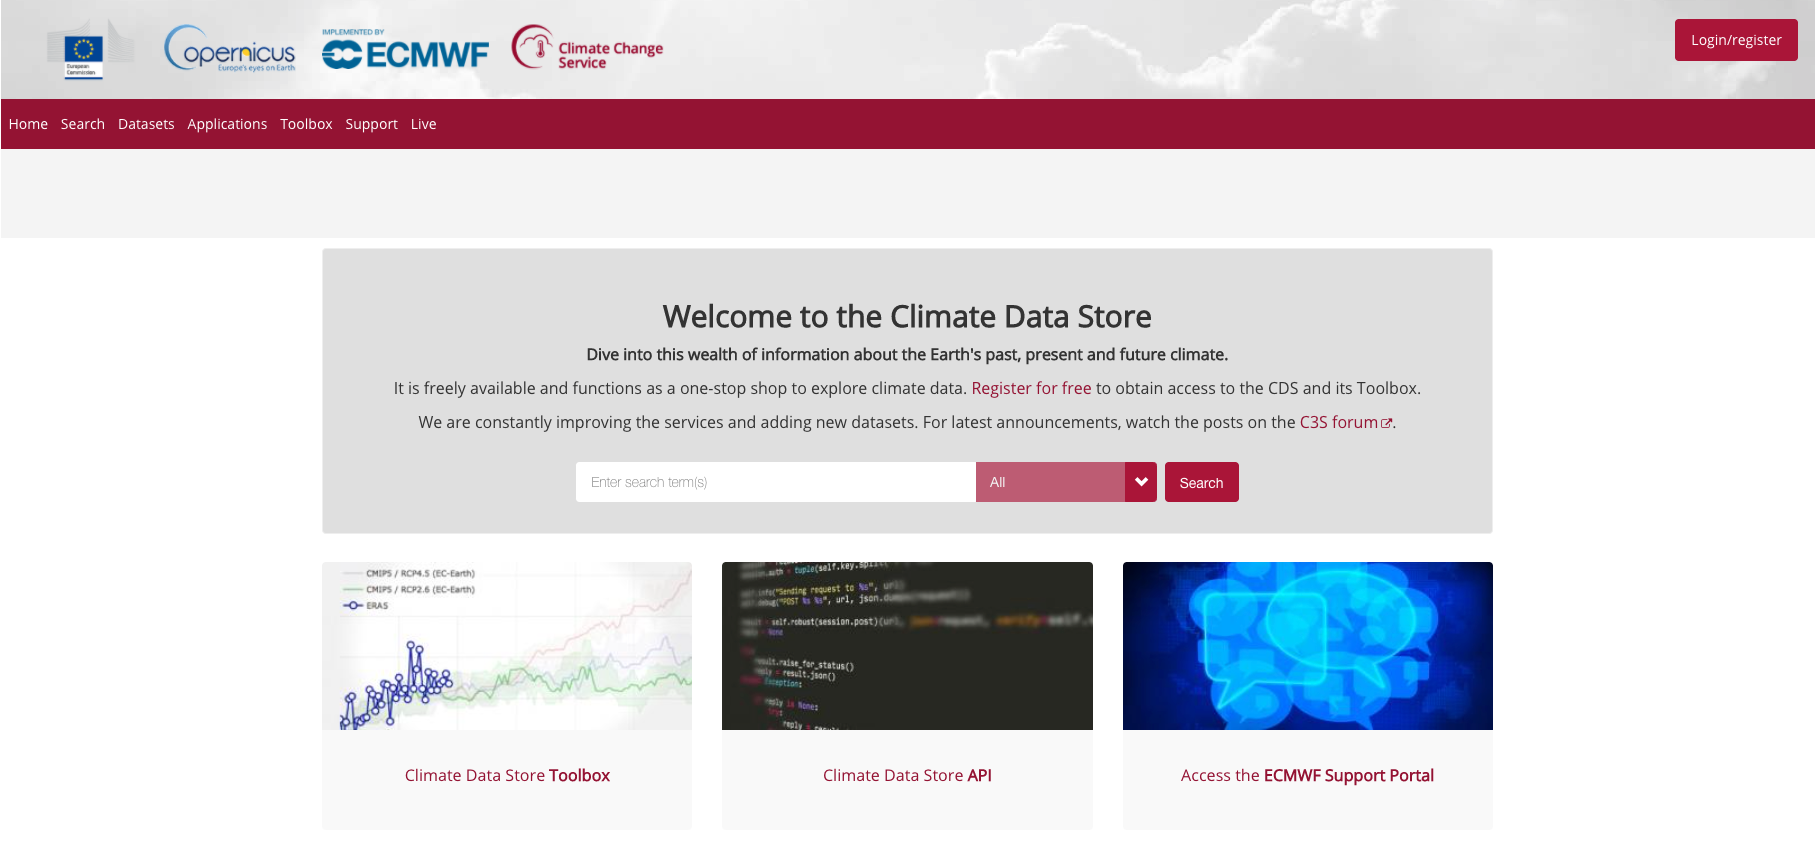<img src='./img/cds_landing_page.png' align='left' width='80%'></img>

## <a id='c3s_data_retrieval'></a>2. Data retrieval

There are two ways to access data from the Copernicus Climate Data Store (CDS):
* [interactively](#access_manual) via the CDS web interface, or
* [programmatically](#access_programmatic) with the CDS API

### <a id='access_manual'></a>2.1 Access data interactively via the CDS web interface

The `CDS web interface` allows you to interactively `browse`, `select` and `download` datasets offered by the CDS. First, under [Datasets](https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset), you can browse and select the dataset you are interested in. In a second step, you can then specify details of the data download form you wish to submit.

#### Filter and select a dataset

As a first step, you can `browse` and `filter` the dataset you are interested in. The [Datasets](https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset) interface allows you either to select data based on different categories, e.g. `Product type`, `Variable domain`, `Spatial / Temporal coverage`, but also offers a free text search. The list of datasets in the main window allows you to select the dataset you are interested in.

<br>

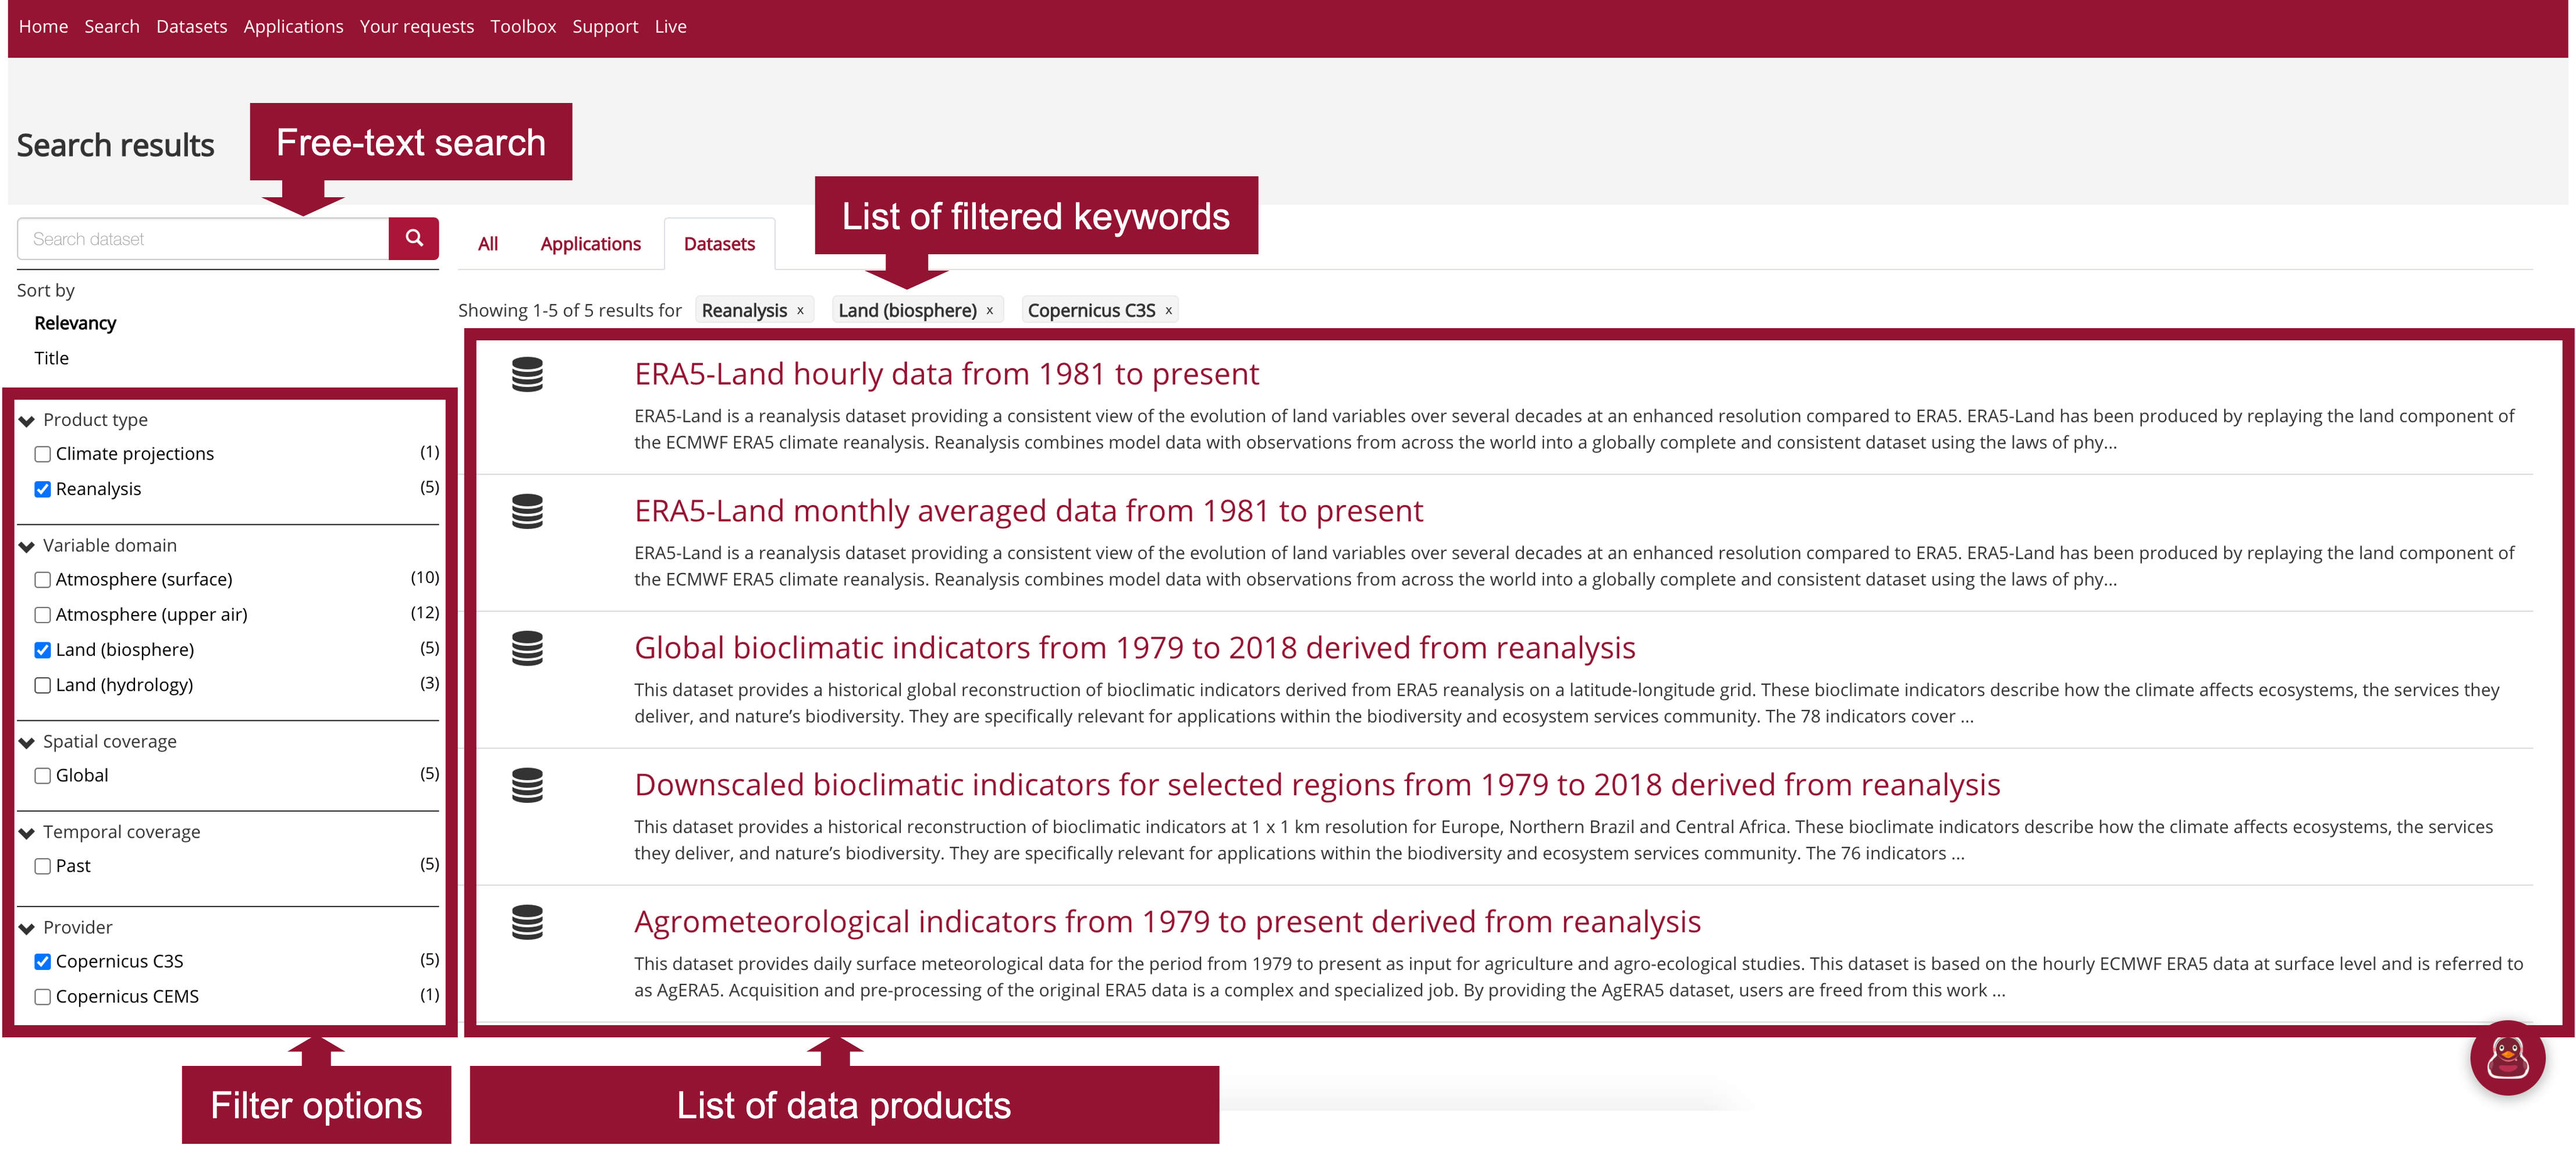

<br>

Once you selected a dataset, you then get redirected to a data description section, which provides you an overview of the chosen dataset as well as the option to specify the dataset you would like to download and to also to submit the `"Download data" form`.

<br>

#### Submit the *Download data* form

The `Data description` section (see 1) provides you an overview of the dataset, including a list of variables that are available. Under the tab `Download data`, the `"Download data" form` opens (see 2) which allows you to  interactively filter the dataset based on specific keywords, e.g.:
* `Product type`
* `Variable`
* `Year / Month / Time`
* `Geographical area`
* `Format`

At the end of the `"Download data" form`, you get three options: `Show API request`, `Show Toolbox request` and `Submit Form`. If you want to download the data interactively, the data requests will be executed as soon as you click on the `Submit Form` button.

**Note:** You need to be logged into the ADS portal and you have to accept the Terms and Conditions of the dataset before being able to download data.


You will need the `Show API request`, if you want to request data programmatically. See [Section 2.2](#access_programmatic) for further information. You will need the `Show Toolbox request`  if you want to request data via the CDS Toolbox. Learn more about the CDS Toolbox [here](https://cds.climate.copernicus.eu/cdsapp#!/toolbox).


<div class="alert alert-block alert-success">
<b>NOTE</b>: <br>
    Under the tab <code>Your requests</code> in the main menu, you can monitor the status of your data requests.</div>

<br>

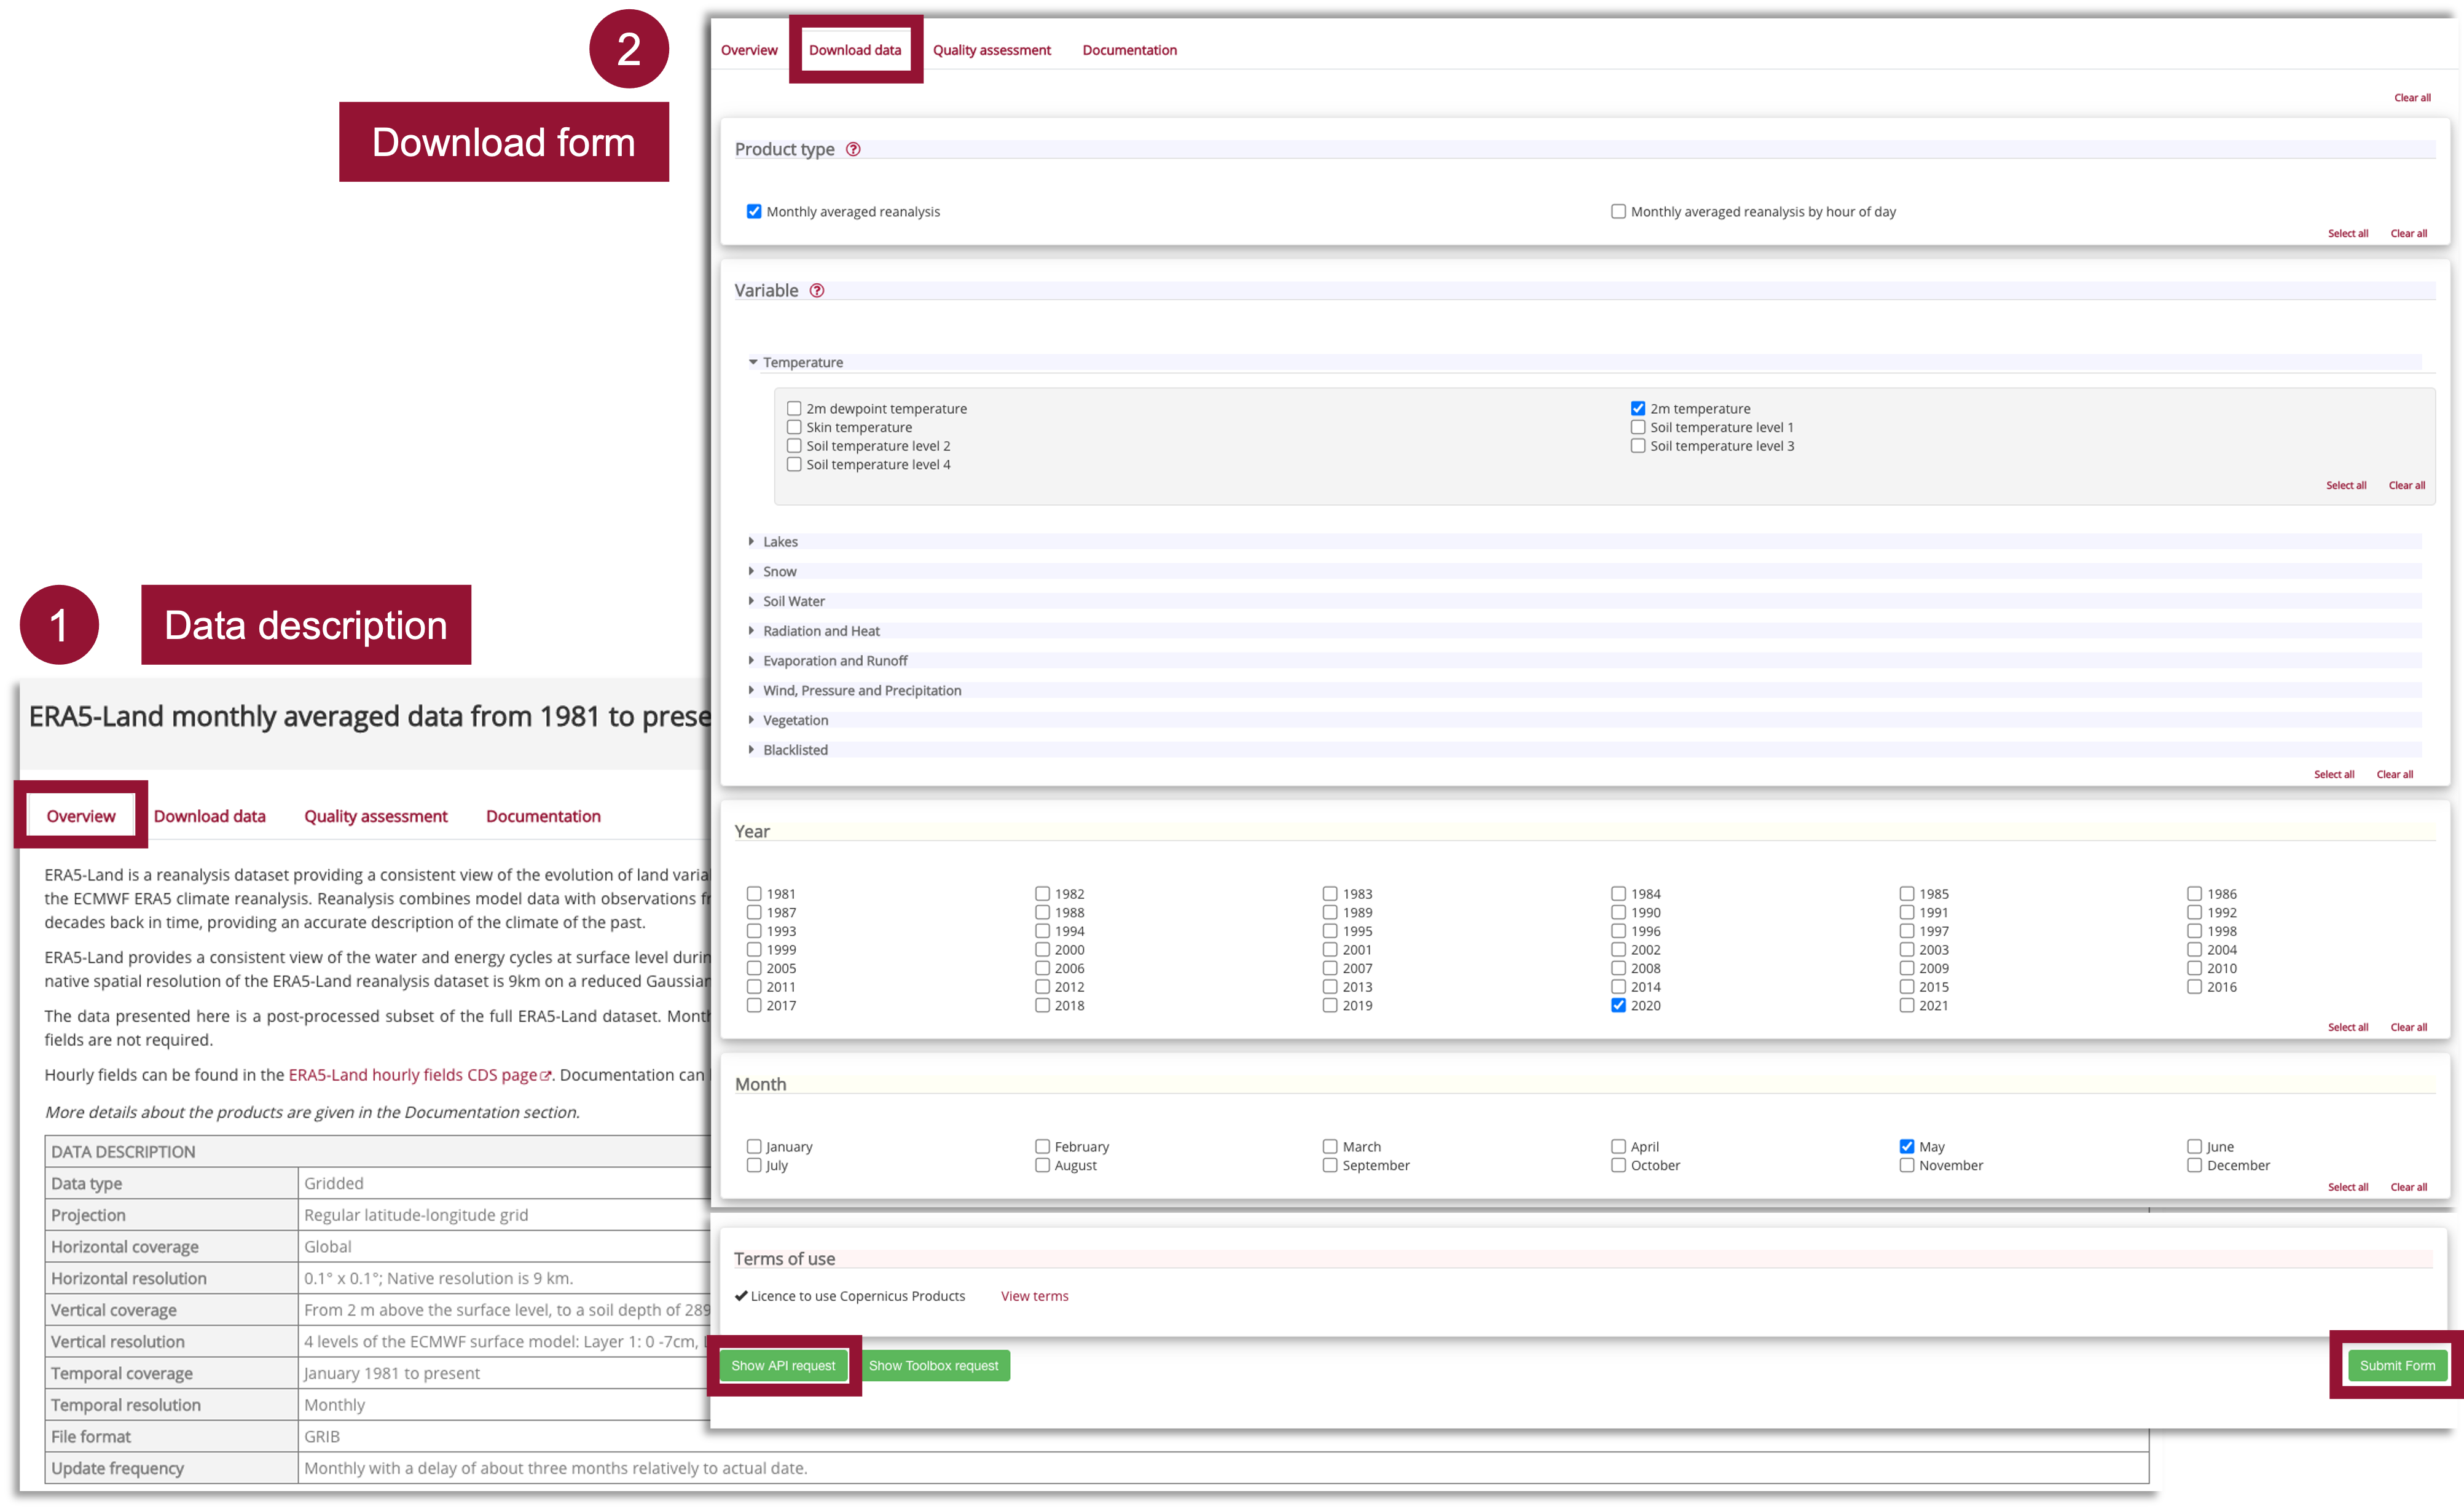

<br>

### <a id='access_programmatic'></a>2.2 Access data programmatically with the CDS API

The `Climate Data Store Application Program Interface (CDS API)` is a Python library which allows you to access data from the CDS programmatically. The library is available for both Python versions, Python 2.7.x and Python 3, but we recommend to use the library under Python 3. In order to use the CDS API, follow the steps below:

#### Install the CDS API key

* [Self-register](https://cds-beta.climate.copernicus.eu/) at the CDS registration page (if you do not have an account yet)
* [Login](https://cds-beta.climate.copernicus.eu/#:~:text=Login,-%2D%20Register) to the CDS portal and go to the [api-how-to page](https://cds-beta.climate.copernicus.eu/how-to-api)
* Copy the CDS API key displayed in the black terminal window in a file under `$HOME/.cdsapirc`

**Note:** You find your CDS API key displayed in the black terminal box under the section `Install the CDS API key`. If you do not see a URL or key appear in the black terminal box, please refresh your browser tab.
  

<img src='./img/cds_api_key.png' align='left' width='60%'></img>
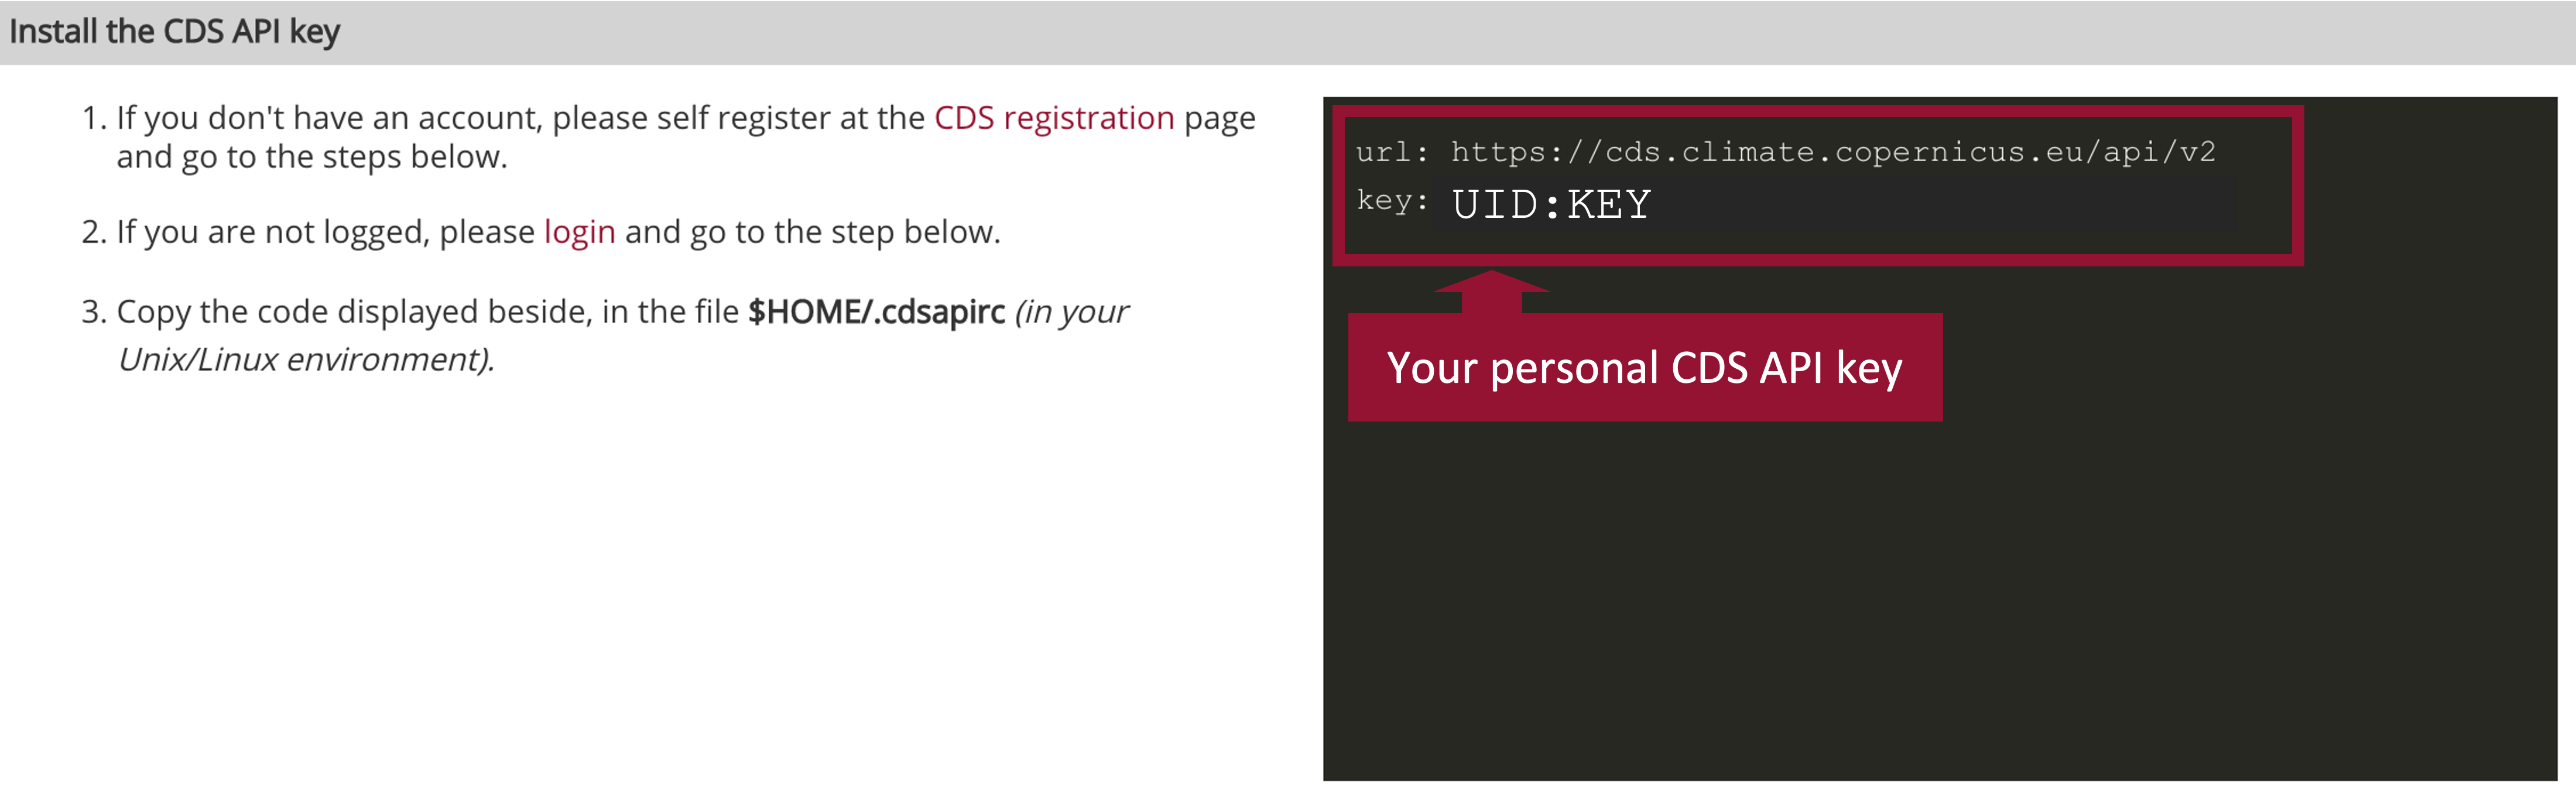

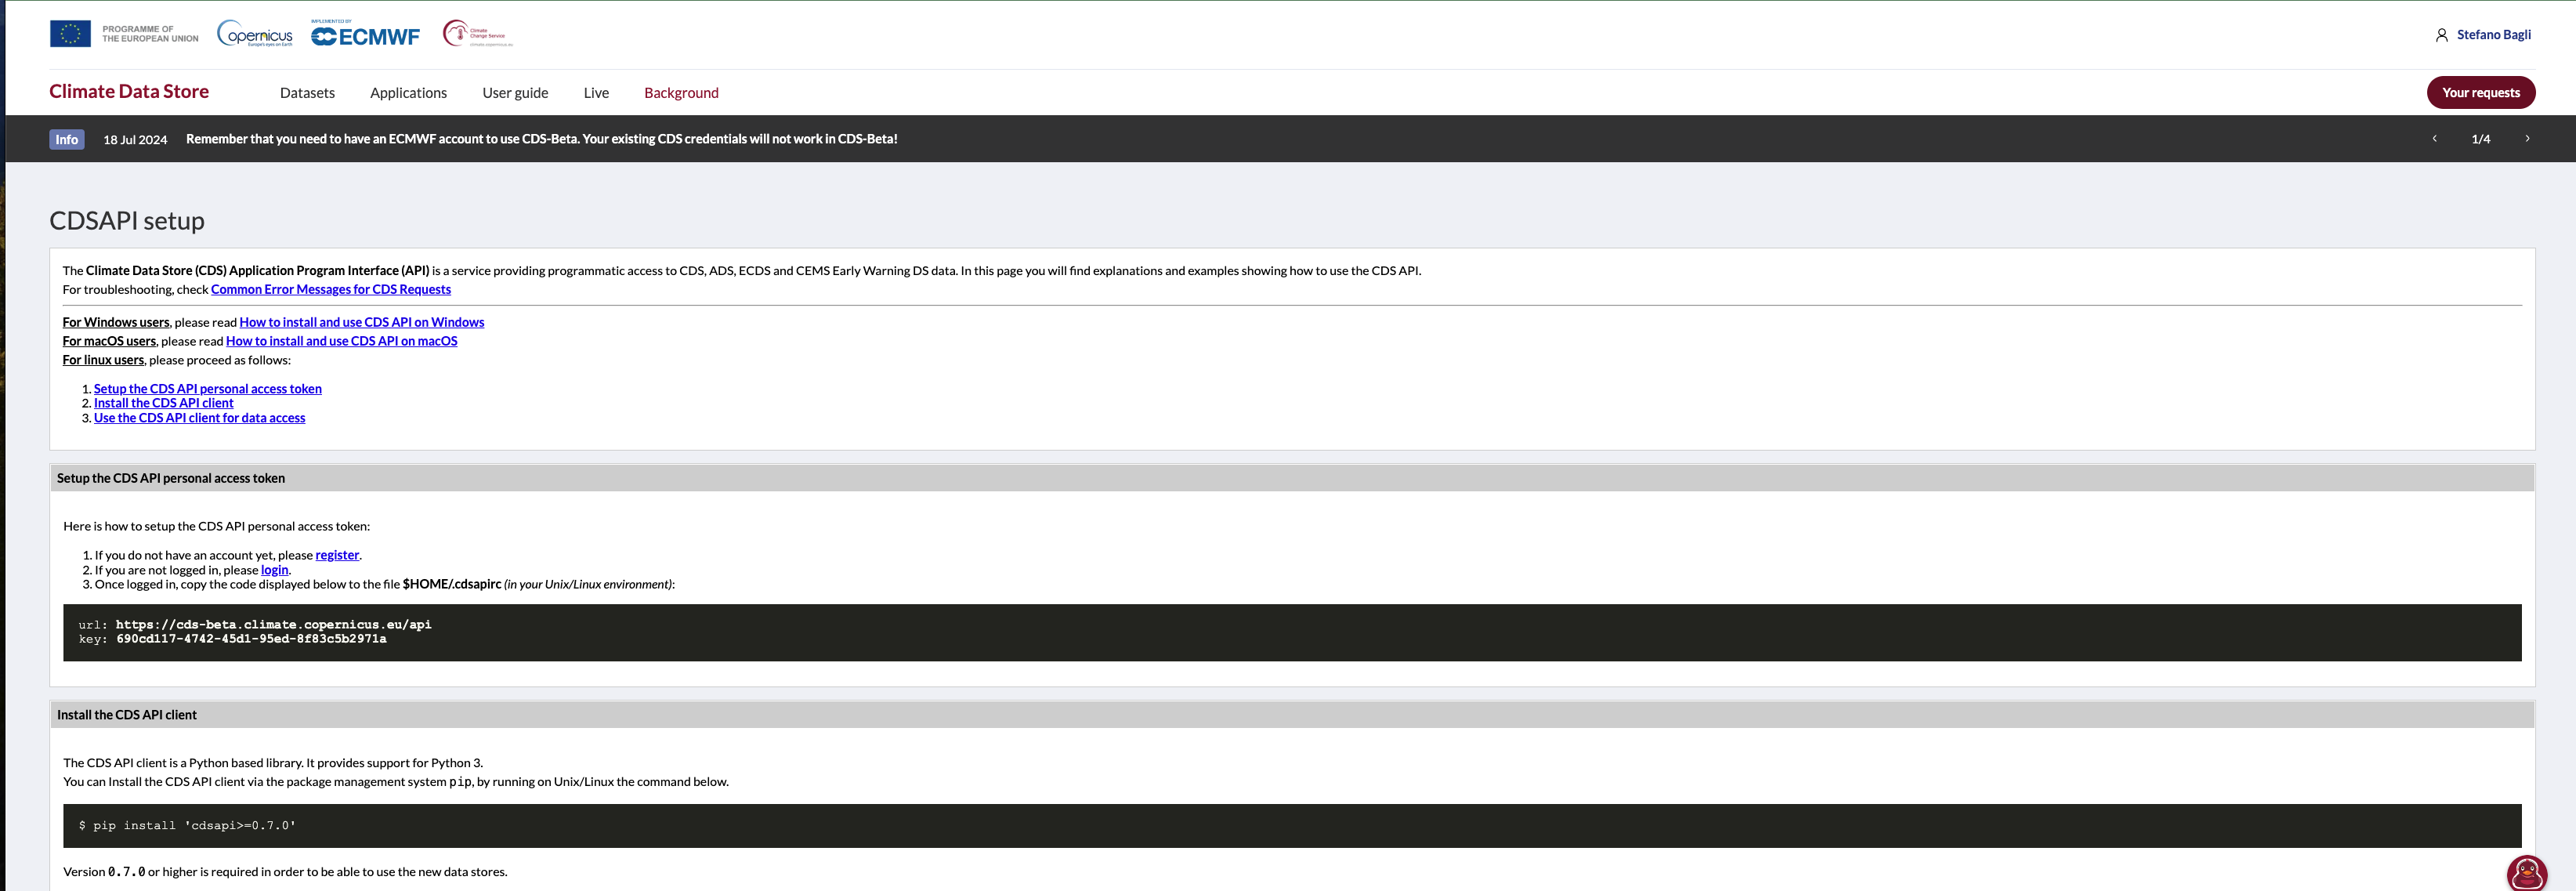

The code below creates the file under your current working directory. Make sure to replace the `################` with your personal `CDS API key`.


In [8]:
%%writefile ./.cdsapirc

url: https://cds.climate.copernicus.eu/api/v2
key: ##############################

Writing ./.cdsapirc


In [23]:

%%writefile ./.cdsapirc

url: https://cds-beta.climate.copernicus.eu/api
key: 690cd117-4742-45d1-95ed-8f83c5b2971a


URL = 'https://cds-beta.climate.copernicus.eu/api'
KEY = '##################################'

Overwriting ./.cdsapirc


<br>

#### Alternative: Set CDS API credentials manually

Alternatively, you can also define variables for `url` and `key`. These variables can then be set when you define the `cdsapi.Client(url=URL, key=KEY)` in your script (see next section for the different components of a data retrieval request).

**Please note:** in the workflow notebooks, we will use this modality and set manually the CDS API key information for the data retrievals.

In [ ]:
URL = 'https://cds.climate.copernicus.eu/api/v2'
KEY = '############################'

In [4]:
#URL = 'https://cds.climate.copernicus.eu/api/v2'
#KEY = '5228:315749ee-5a3c-4521-a7af-54fe9ac09b19'

URL = 'https://cds-beta.climate.copernicus.eu/api'

KEY = '690cd117-4742-45d1-95ed-8f83c5b2971a' ##beta




In [5]:
DATADIR = './'

<br>

#### Install the CDS API client

The next step is to install the `CDS API client`. You can do this with the package management system `pip`.

In [6]:
#OLD VERSION
#!pip install cdsapi

#NEW BETA VERSION

!pip install 'cdsapi>=0.7.0'

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.1-py3-none-any.whl size=21131 sha256=85a42eb24f5d70c141dd13ba85c671a1b89b3ec225687fabeb8d68cd1dc105a2
  Stored in directory: /root/.cache/pip/wheels/9b/d9/5f/36a39fd10d15b5b2d362ad6dc8a1bd28a3b1e14e08357944bf
Successfully built multiurl


#### Install the new package EARTHKIT

In [8]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.5 MB/s eta 0:00:00


<br>

#### Use the CDS API client for data access

Once the `CDS API` is installed, it can be used to request data from the Climate Data Store.

Below, you see the principle of a `data retrieval` request. You always have to make sure to first import the `cdsapi` and define a `cdsapi.Client()` before you are able to execute an `API request`. You can use the [web interface](https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset) to browse through the datasets. At the end of the `"Download data" form`, there is the option to choose `Show API request`. If you click this button, the `API request` appears (see example below), which you can copy paste into your coding workflow.

<br>

<div><img src='./img/cdsapi_request.png' align='left' width='30%'></img></div>

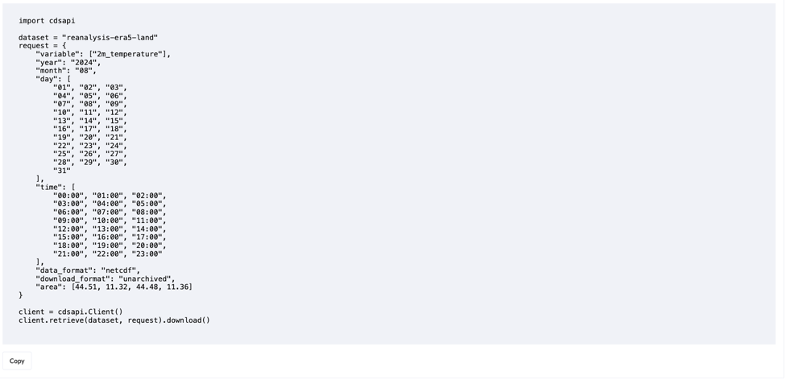




<br>

<div class="alert alert-block alert-success">
<b>NOTE</b>: <br>
    For data originating from ECMWF's Meteorological and Archival System (MARS), data is stored on a grid with longitudes from 0 to 360 degrees. It can be reprojected to a regular geographic latitude-longitude grid, by setting the keyword argument <code>area</code> and <code>grid</code>. Per default, data is retrieved in <code>GRIB</code>. If you wish to retrieve the data in <code>netCDF</code>, you have to specify it by using the keyword argument <code>format</code>.</div>
    
<br>


### <a id='further_resources'></a> 2.3 Further resources

* [Climate Data Store (ADS) documentation](https://confluence.ecmwf.int/x/QhhsCg)
* [Common Error Messages for CDS Requests](https://confluence.ecmwf.int/x/RKOpD)
* [Climate Data Store (CDS) API Keywords](https://confluence.ecmwf.int/x/kjo1Cw)

<hr>

## <a id='example_requests - Bologna Temperature 2 m in August 2024'></a>3. Example data request

#### <a id='era5-land_hourly'></a>Example: **ERA5-Land hourly data from 1950 to present**

CDS API name: `reanalysis-era5-land`

> - Variable: `['2m_temperatire']`
> - Year: `[2024]`
> - Month: `08`
> - Day: `all`
> - Time: `all`
> - Area: `[44.51, 11.32, 44.48, 11.36]` # North, West, South, East
> - Format: `netcdf`

In [10]:
import cdsapi

dataset = "reanalysis-era5-land"
request = {
    "variable": ["2m_temperature"],
    "year": "2024",
    "month": "08",
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "unarchived",
    "area": [44.51, 11.32, 44.48, 11.36]
}

client = cdsapi.Client(url=URL, key=KEY)
client.retrieve(dataset, request).download()


2024-09-30 12:46:38,224 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
INFO:cads_api_client.processing:[2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-09-30 12:46:38,227 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informative pa

21d666330200e61753501e096427fbdf.nc:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

'21d666330200e61753501e096427fbdf.nc'

In [11]:
!ls

 0.2_rasterio.ipynb				    '6_webapps 2.ipynb'
 0_notebooks.ipynb				     6_webapps.ipynb
 1_C3S_climate-data-store.ipynb			     Bagli_Geospatial_2024.pptx
 21d666330200e61753501e096427fbdf.nc		     C3S_data-tutorial-italiano_2020-11.ipynb
 2_reanalysis-climatology.ipynb			    'Create your first book.pdf'
 3_Emilia_Romagna_Flood_2024.ipynb		     data
 4_Hazard_assessment_FLOOD_COASTAL_floodmaps.ipynb   img
'5_applications_GEE (1).ipynb'			     leafmap.ipynb
 5_applications_GEE.ipynb


##Visualise with Panoply or QGIS

#### <a id='era5-land_hourly'></a>Example: **ERA5-Land hourly data from 1950 to present**

CDS API name: `reanalysis-era5-land`

> - Variable: `['10m_u_component_of_wind', '10m_v_component_of_wind','2m_temperature']`
> - Year: `[1981 to 2020]`
> - Month: `12`
> - Day: `15`
> - Time: `12:00`
> - Area: `[60, -10, 35, 30]` # North, West, South, East
> - Format: `netcdf`

**Note:** the request above makes use of the keyword `area`, which enable you to retrieve only a geographical subset. The bounding box information are set as follows: `[N, W, S, E]`. When this keyword is set, the data is automatically projected to a grid from [-180, 180].  

In [ ]:
import cdsapi
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'variable': [
            '10m_u_component_of_wind', '10m_u_component_of_wind', '2m_temperature',
        ],
        'year': [
            '1981', '1982', '1983',
            '1984', '1985', '1986',
            '1987', '1988', '1989',
            '1990', '1991', '1992',
            '1993', '1994', '1995',
            '1996', '1997', '1998',
            '1999', '2000', '2001',
            '2002', '2003', '2004',
            '2005', '2006', '2007',
            '2008', '2009', '2010',
            '2011', '2012', '2013',
            '2014', '2015', '2016',
            '2017', '2018', '2019',
            '2020',
        ],
        'month': '12',
        'day': '15',
        'time': '12:00',
        'format': 'netcdf',
        'area': [
            60, -10, 35,
            30,
        ],
    },
    './data/era5-land_eur_1981_2020.nc')

<hr>

#Microsoft Planetary
https://planetarycomputer.microsoft.com/

In [1]:
!pip install -U pystac_client
!pip install -U planetary_computer
!pip install zarr
!pip install -U xarray
!pip install adlfs
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.0 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=26dee94f439dc46389f6675b1ff5673b9d78dd052ed517766fe885d676af04db
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.4/197.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.6/405.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import xarray as xr
import pystac_client
import planetary_computer
import pandas as pd
import numpy as np
import netCDF4
import os
from google.colab import drive

In [3]:
from datetime import datetime, timedelta
import xarray as xr
import pystac_client
import planetary_computer
import numpy as np
import pandas as pd

def round_coordinates(coord, interval=0.25):
    """Rounds the coordinates to the nearest grid point."""
    return [round(c / interval) * interval for c in coord]

def fetch_rain_bbox(varname, factor, location, start_date, end_date):
    """
    Fetches ERA5 precipitation data for a specified bounding box, date range, and variable name,
    accumulating the data monthly.
    """
    catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1/")
    monthly_dataarrays = []

    current_month_start = pd.to_datetime(start_date)
    while current_month_start <= pd.to_datetime(end_date):
        next_month_start = (current_month_start.replace(day=28) + timedelta(days=4)).replace(day=1)
        current_month_end = next_month_start - timedelta(days=1)

        search_results = catalog.search(
            collections=["era5-pds"], datetime=[current_month_start.isoformat(), current_month_end.isoformat()], query={"era5:kind": {"eq": "fc"}}
        )


        items = list(search_results.items())
        for item in items:
            signed_item = planetary_computer.sign(item)
            asset = signed_item.assets.get(varname)
            if asset:
                dataset = xr.open_dataset(asset.href, **asset.extra_fields["xarray:open_kwargs"])
                wind_ds = dataset[varname]
                interval = 0.25
                rounded_coord = round_coordinates(location, interval)
                wind_ds_sliced = wind_ds.sel(lat=slice(rounded_coord[1], rounded_coord[0]), lon=slice(rounded_coord[2], rounded_coord[3])) * factor
                monthly_dataarrays.append(wind_ds_sliced)

        current_month_start = next_month_start

    # Concatenate all monthly DataArrays along the time dimension if any data was fetched
    if monthly_dataarrays:
        combined = xr.concat(monthly_dataarrays, dim="time")
        return combined
    else:
        return None


In [62]:
varnname_Rain="precipitation_amount_1hour_Accumulation"
location=[-31,-29,26,29]

factor = 1000




start_date = datetime(1995, 1, 1)
end_date = datetime(1995, 12, 31)

precipitation_data = fetch_rain_bbox(varnname_Rain, factor, location, start_date, end_date)


In [63]:
precipitation_data

<xarray.DataArray 'precipitation_amount_1hour_Accumulation' (time: 8760,
                                                             lat: 9, lon: 13)> Size: 4MB
dask.array<concatenate, shape=(8760, 9, 13), dtype=float32, chunksize=(372, 9, 13), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 36B -29.0 -29.25 -29.5 -29.75 ... -30.5 -30.75 -31.0
  * lon      (lon) float32 52B 26.0 26.25 26.5 26.75 ... 28.25 28.5 28.75 29.0
  * time     (time) datetime64[ns] 70kB 1995-01-01 ... 1995-12-31T23:00:00

In [60]:
import plotly.express as px
import plotly.graph_objects as go

In [64]:
precipitation_data=precipitation_data.sum(dim='time')


NameError: name 'data_ERA5_sum' is not defined

In [66]:
fig = px.imshow(precipitation_data, labels=dict(x="Longitude", y="Latitude", color="sum year"),x=precipitation_data.lon,y=precipitation_data.lat)


In [67]:
fig.update_traces(hoverinfo='x+y+z', showscale=True)


<p></p>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>